In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\Airbnb+Data\\Airbnb Data\\Listings.csv", low_memory=False, encoding="ISO-8859-1")


In [10]:
data.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [12]:
data.shape

(279712, 33)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

## Cast any date columns as a datetime format

In [15]:
# Handling dates - Cast any date columns in datatime format

data["host_since"]= pd.to_datetime(data["host_since"])
data["host_since"]


0        2011-12-03
1        2013-11-29
2        2014-07-31
3        2013-12-17
4        2014-12-14
            ...    
279707   2015-04-13
279708   2013-11-27
279709   2012-04-27
279710   2015-07-16
279711   2013-06-17
Name: host_since, Length: 279712, dtype: datetime64[ns]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

There are 2 ways of handling dates 
1) We exclusively convert the datatype to date 
2) We mention while reading the file. (.., parse_dates=["host_since"])

## Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’

In [23]:
paris_listings = data.query("city == 'Paris'").loc[:,["host_since", "neighbourhood", "city","accommodates","price"]]
paris_listings.shape


(64690, 5)

In [27]:
print(paris_listings.head())
print(paris_listings.info())

  host_since      neighbourhood   city  accommodates  price
0 2011-12-03  Buttes-Montmartre  Paris             2     53
1 2013-11-29  Buttes-Montmartre  Paris             2    120
2 2014-07-31             Elysee  Paris             2     89
3 2013-12-17          Vaugirard  Paris             2     58
4 2014-12-14              Passy  Paris             2     60
<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB
None


## QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [25]:
paris_listings.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [28]:
paris_listings.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [30]:
# Minimum value is 0 which is a little concerning
paris_listings.query("accommodates == 0").count()


host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [31]:
paris_listings.query("price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [32]:
paris_listings.query(" accommodates == 0 and price == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [33]:
# This is a very small proportion of data, hence, will not effect our summary statitics much

## Prepare the data for visualization
### To produce DataFrames that will be used in visualizations by aggregating and manipulating the listings data in several ways.

In [36]:
paris_listings_neighbourhood = paris_listings.groupby("neighbourhood").agg({"price":"mean"}).sort_values("price")

paris_listings_neighbourhood

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


In [37]:
paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [38]:
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [57]:
paris_listings_accommodate = paris_listings.query("neighbourhood == 'Elysee'").groupby("accommodates").agg({"price":"mean"}).sort_values("price")
paris_listings_accommodate

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070
5,328.817073
6,355.508571
8,405.518519
7,411.538462


In [47]:
paris_listing_overtime = paris_listings.set_index("host_since").resample("Y").agg({"neighbourhood":"count","price":"mean"})
paris_listing_overtime

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8871,114.159847


## Visualize the data and summarize findings
### To build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

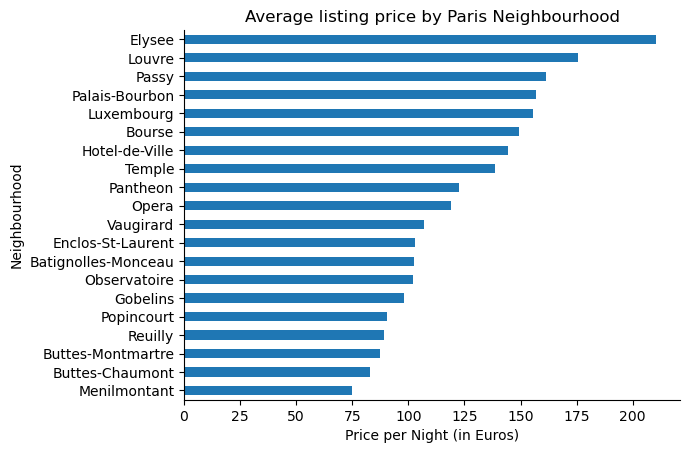

In [54]:
paris_listings_neighbourhood.plot.barh(title="Average listing price by Paris Neighbourhood",xlabel="Price per Night (in Euros)",ylabel="Neighbourhood",legend=None)

sns.despine()

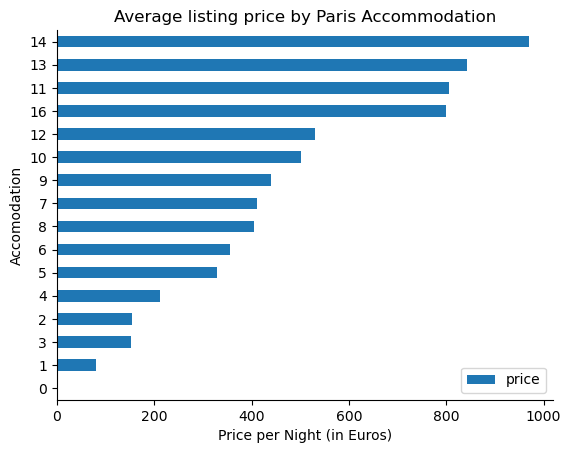

In [58]:
paris_listings_accommodate.plot.barh(title="Average listing price by Paris Accommodation",xlabel="Price per Night (in Euros)",ylabel="Accomodation")
sns.despine()

<Axes: title={'center': 'New AirBnB hosts in Paris'}, xlabel='host_since', ylabel='New hosts'>

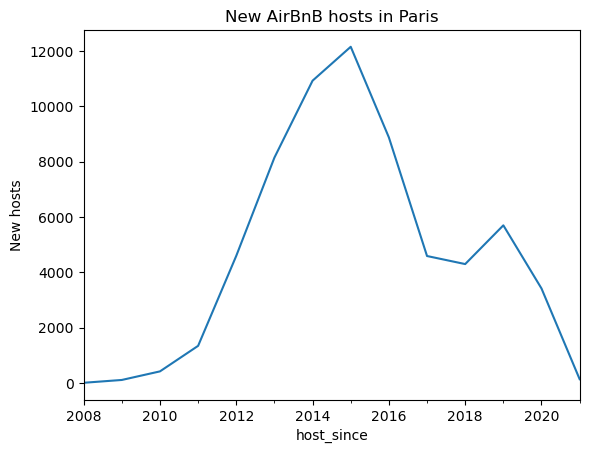

In [59]:
paris_listing_overtime["neighbourhood"].plot(
    title="New AirBnB hosts in Paris",
    ylabel="New hosts",
    )

<Axes: title={'center': 'New AirBnB Price in Paris over-time'}, xlabel='host_since', ylabel='Average Price'>

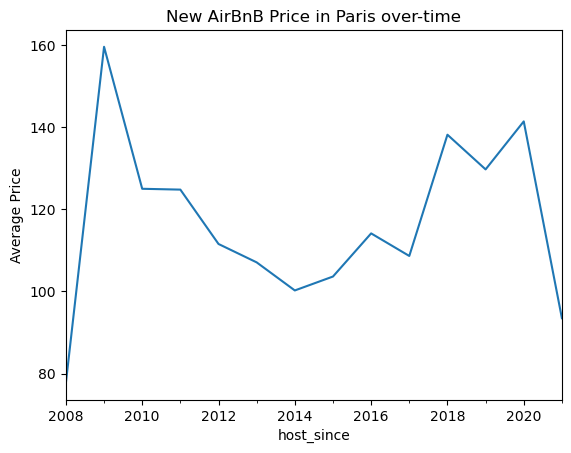

In [60]:
paris_listing_overtime["price"].plot(
    title="New AirBnB Price in Paris over-time",
    ylabel="Average Price",
    )

In [61]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Average Price')

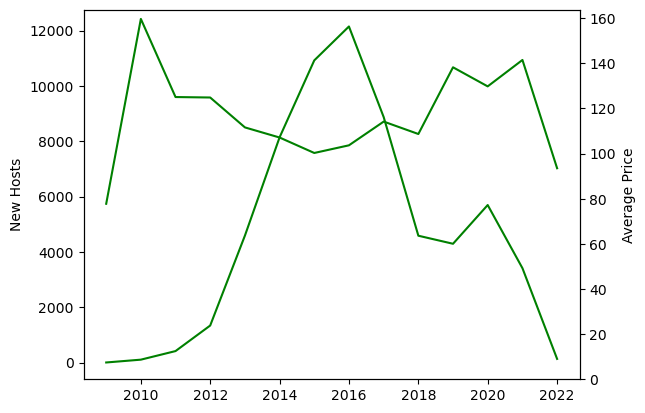

In [66]:
fig, ax = plt.subplots()

ax.plot(

    paris_listing_overtime.index,
    paris_listing_overtime["neighbourhood"],
    label="New Hosts",
    c="green"
    
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(

    paris_listing_overtime.index,
    paris_listing_overtime["price"],
    label="Average Price",
    c="green"
    
)

ax2.set_ylim(0)
ax2.set_ylabel("Average Price")